<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/AffineTransform_Homography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import argparse
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images'
imgPath=root_path+"/square2.png"


Mounted at /content/gdrive


In [ ]:
im = cv2.imread(imgPath,1)
if (im.any() == None):
  print("Empty Image")

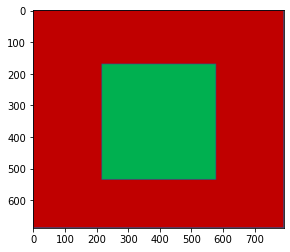

In [ ]:
plt.imshow(im[...,::-1])

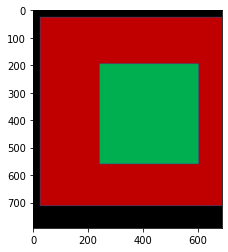

In [ ]:
outDim = im.shape[0:2]

# Translate by 25,25
# Warp Affine Matrix - first two columns - identity matxix
# used for rotation,shear and scale
# last column used for translation - move in x and y direction
warpMat = np.float32(
    [
        [1.0, 0.0, 25],
        [0,   1.0, 25]
    ])

# Warp image
result = cv2.warpAffine(im, warpMat, outDim)

# Display image
plt.imshow(result[...,::-1])

### scaling the image in X direction

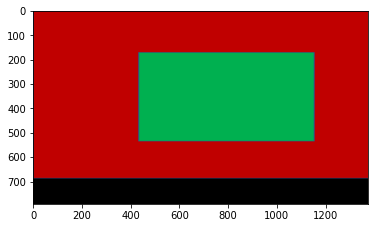

In [ ]:
outDim = im.shape[0:2]

# Translate by 25,25
# Warp Affine Matrix - first two columns - identity matxix
# used for rotation,shear and scale
# last column used for translation - move in x and y direction
warpMat = np.float32(
    [
        [2.0, 0.0, 0],
        [0,   1.0, 0]
    ])

# Warp 
result = cv2.warpAffine(im, warpMat, (2*outDim[0],outDim[1])) # Note output dimension also need to be changed

# Display image
plt.imshow(result[...,::-1])

## Scale in Y Direction

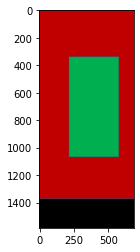

In [ ]:
outDim = im.shape[0:2]

# Translate by 25,25
# Warp Affine Matrix - first two columns - identity matxix
# used for rotation,shear and scale
# last column used for translation - move in x and y direction
warpMat = np.float32(
    [
        [1.0, 0.0, 0],
        [0,   2.0, 0]
    ])

# Warp 
result = cv2.warpAffine(im, warpMat, (1*outDim[0],2*outDim[1])) # Note output dimension also need to be changed

# Display image
plt.imshow(result[...,::-1])

Scale in X and Y Direction

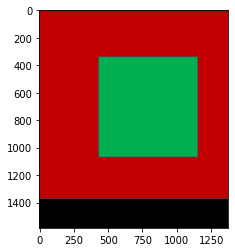

In [ ]:
outDim = im.shape[0:2]

# Translate by 25,25
# Warp Affine Matrix - first two columns - identity matxix
# used for rotation,shear and scale
# last column used for translation - move in x and y direction
warpMat = np.float32(
    [
        [2.0, 0.0, 0],
        [0,   2.0, 0]
    ])

# Warp 
result = cv2.warpAffine(im, warpMat, (2*outDim[0],2*outDim[1])) # Note output dimension also need to be changed

# Display image
plt.imshow(result[...,::-1])

Rotate Image about the origin (0,0)
Let's say we want to rotate a point  (x,y)  about the original by an angle  θ . The new point  (x′,y′)  after rotation is given by

[x′y′]=[cosθ−sinθsinθcosθ][xy]
 
You can read about it more at this link Rotation Matrix. You may notice a difference in sign between our matrix and that of Wikipedia. It is simply because of the difference in what is considered positive  θ  -- anti-clockwise vs. clockwise.

The affine matrix is given by.

[cosθ−sinθsinθcosθ00]
 
Notice, the first two columns form the rotation matrix, and the last column indicates zero translation


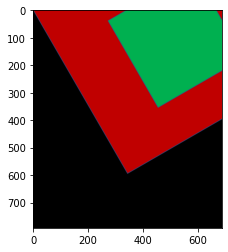

In [ ]:
# Rotate image 
angleInDegrees = 30
angleInRadians = 30 * np.pi / 180.0

cosTheta = np.cos(angleInRadians)
sinTheta = np.sin(angleInRadians)

# Rotation matrix 
# https://en.wikipedia.org/wiki/Rotation_matrix
    
warpMat = np.float32(
    [
        [ cosTheta, sinTheta, 0],
        [ -sinTheta, cosTheta, 0]
    ])

# Warp image
result = cv2.warpAffine(im, warpMat, outDim)

# Display image
plt.imshow(result[...,::-1])

## Note : Image got rotated by origin (0,0)

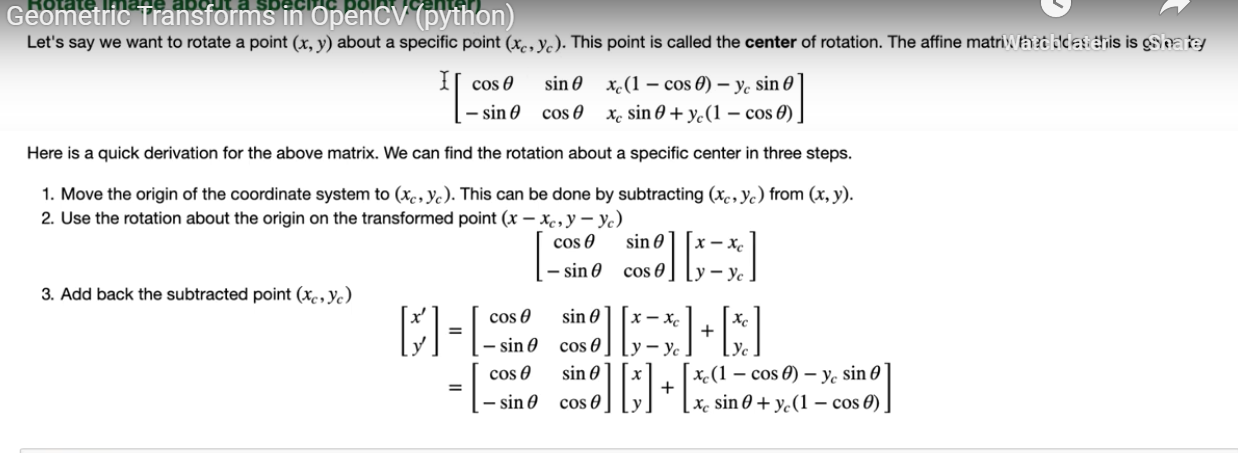

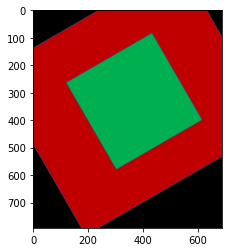

In [ ]:
# Get rotation matrix
centerX = im.shape[0] / 2
centerY = im.shape[1] / 2
angleInDegrees = 30
angleInRadians = 30 * np.pi / 180.0

rotationMatrix = cv2.getRotationMatrix2D((centerX, centerY), angleInDegrees, 1)

# Warp Image
result = cv2.warpAffine(im, rotationMatrix, outDim)

# Display image
plt.imshow(result[...,::-1])

Complex Transformations
Now, let's say we want to perform multiple operations -- rotation, scale, shear, and translate. We can obviously the transforms one after the other, but a more efficient way is to do this in one shot. This can be done by multiplying the non-translation part of the the matrices, and adding the translation parts.

Let's do a experiment where we first scale the image by 1.1, shear it by -0.1, rotate it by 10 degrees, and move in in the x direction by 10 pixels.

[[ 1.1817694  -0.02797605 10.        ]
 [-0.20837782  1.2234448   0.        ]]
[[ 67.68967   64.920044 184.68483  181.9152  ]
 [ 50.75335  171.87439   30.123945 151.24498 ]]


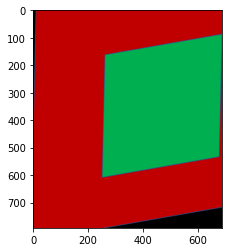

In [ ]:
# Scale 
scaleAmount = 1.2
scaleMat = np.float32(
    [
        [ scaleAmount, 0.0,       ],
        [ 0,           scaleAmount]
    ])

# Shear 
shearAmount = -0.2
shearMat = np.float32(
    [
        [ 1, shearAmount],
        [ 0, 1.0        ]
    ])

# Rotate by 10 degrees about (0,0)

angleInRadians = 10.0 * np.pi / 180.0

cosTheta = np.cos(angleInRadians)
sinTheta = np.sin(angleInRadians)

rotMat = np.float32(
    [
        [ cosTheta, sinTheta],
        [ -sinTheta, cosTheta]
    ])

translateVector = np.float32(
    [
        [10],
        [0]
    ])

# First scale is applied, followed by shear, followed by rotation. 
scaleShearRotate = rotMat @ shearMat @ scaleMat

# Add translation
warpMat = np.append(scaleShearRotate, translateVector, 1)
print(warpMat)
outPts = scaleShearRotate @ np.float32([[50, 50],[50, 149],[149, 50], [149, 149]]).T + translateVector
print(outPts)

# Warp image
result = cv2.warpAffine(im, warpMat, outDim)

# Display image
plt.imshow(result[...,::-1])

## Affine Transform has only 6 degrees of freedom.
Complex Transformations using 3-Point Correspondences
You can see specifying the affine transform can become very cumbersome. Is there an easier way?

Yes!

We know that an affine transfrom that 6 degrees of freedom

Two for translation (tx, ty)
Two for scale (sx, sy)
One for shear
One for in-plane rotation
This means that if two images are related by an affine transform and we know the location of at least 3 points ( i.e. 6 coordinates ) in the source image and the destination image, we can recover the affine transform between them.

Now, let us consider the coordinates of 3 corners of the original square. They are located at (50,50), (50, 149) and (149, 50).

In the destination image above, the points are at (74, 50), (83,170), (192, 29) respectively. We can use the function estimateAffine2D to calculate the matrix.

In [ ]:
srcPoints = np.float32([[50, 50],[50, 149],[149, 50]])
dstPoints = np.float32([[67.68967, 50.75335],[64.920044, 171.87439],[184.68483, 30.123945]])
estimatedMat = cv2.estimateAffine2D(srcPoints, dstPoints)[0]
print("True warp matrix:\n\n", warpMat)
print("\n\nEstimated warp matrix:\n\n", estimatedMat)

True warp matrix:

 [[ 1.1817694  -0.02797605 10.        ]
 [-0.20837782  1.2234448   0.        ]]


Estimated warp matrix:

 [[ 1.18176932e+00 -2.79759879e-02  1.00000000e+01]
 [-2.08377819e-01  1.22344485e+00 -2.35047003e-06]]


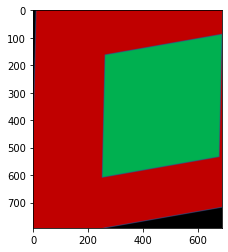

In [ ]:
# Warp image
result = cv2.warpAffine(im, estimatedMat, outDim)

# Display image
plt.imshow(result[...,::-1])